In [143]:
import numpy as np
from astropy.io import fits
import matplotlib 
import matplotlib.pyplot as plt

In [144]:
test=0
test=input("scegliere un test da 1 a 3: ")

scegliere un test da 1 a 3: 1


In [145]:

TEST_COVARIANCE= True
PLOTS=True

In [146]:
Nbins=200
Nmeasures=1000
measures_1=[]
measures_2=[]
measures_3=[]

In [147]:
for n in np.arange(Nmeasures)+1:
       fname = f'/home/marco/Scaricati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{n}.fits'
       file=fits.open(fname)
       table=file[1].data.copy()
       measures_1.append(table['XI0'])
       measures_2.append(table['XI2'])
       measures_3.append(table['XI4'])
       if n==1:
        scale = table['SCALE']
       del table
       file.close()

measures_1=np.asarray(measures_1).transpose()
measures_2=np.asarray(measures_2).transpose()
measures_3=np.asarray(measures_3).transpose()

In [148]:
measures=np.concatenate((measures_1, measures_2, measures_3))

In [149]:
#Covarianza calcolata con numpy

In [150]:
mean_xi=np.mean(measures,axis=1)
cov_xi=np.cov(measures)

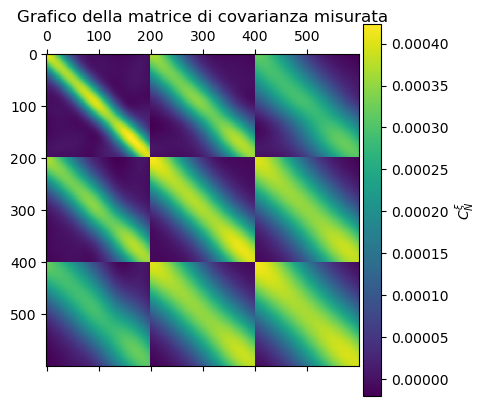

In [151]:
# Grafico della matrice di covarianza trovata
plt.matshow(cov_xi)
plt.title('Grafico della matrice di covarianza misurata')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [152]:
#matrice di correlazione


In [153]:
corr_xi=np.zeros((Nbins, Nbins), dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        corr_xi[i,j]=cov_xi[i,j]/(cov_xi[i,i]*cov_xi[j,j])**0.5

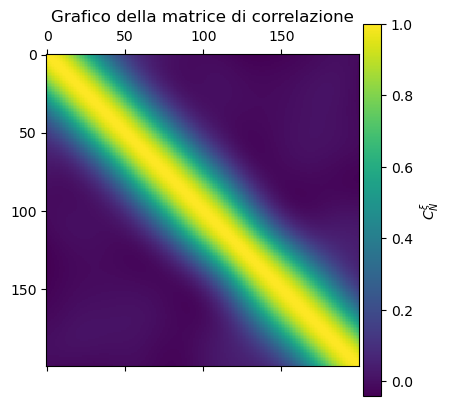

In [154]:
#grafico matrice di correlazione
plt.matshow(corr_xi)
plt.title('Grafico della matrice di correlazione')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [155]:
#covarianza teorica

In [156]:
if test==1:
    sigs = [0.02, 0.02, 0.02]
    ls = [25, 50, 75]
elif test==2:
    sigs = [0.02, 0.01, 0.005]
    ls = [50, 50, 50]
else:
    sigs = [0.02, 0.01, 0.005]
    ls = [5, 5, 5]

In [167]:
def cov_th(r1, r2, sigma1, sigma2, h1, h2):
    return sigma1*sigma2*(np.sqrt((2.*h1*h2)/(h1**2+h2**2)))*np.exp(-(r1 - r2)**2./(h1**2+h2**2))

In [158]:
C_th=np.zeros((600,600),dtype=float)

In [159]:
for s in range(0,2):
    for e in range(0,2):
     for i in range(Nbins):
      for j in range(Nbins):
        C_th[i+s*Nbins,j+e*Nbins] = cov_th(scale[i],scale[j],sigs[s], sigs[e], ls[s], ls[e])

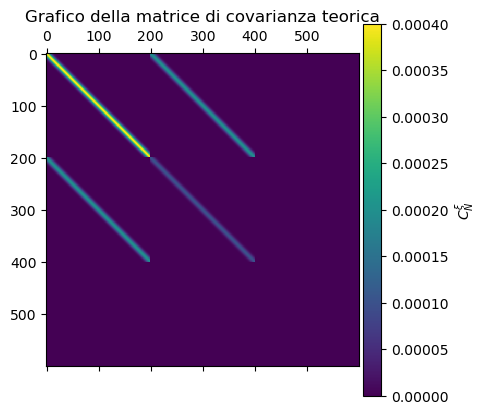

In [160]:
#grafico covarianza teorica
plt.matshow(C_th)
plt.title('Grafico della matrice di covarianza teorica')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

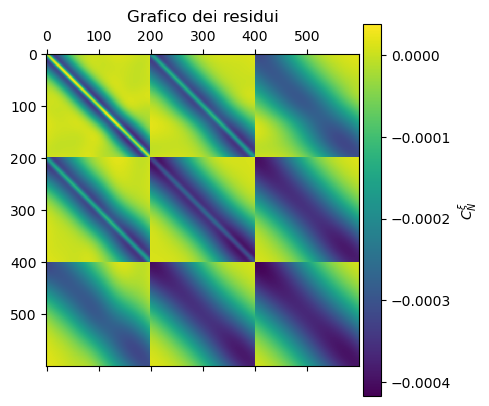

In [161]:
#grafico residui
plt.matshow(C_th-cov_xi)
plt.title('Grafico dei residui')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [169]:
R = np.zeros_like(C_th)
residui = np.zeros_like(C_th)
for i in range(Nbins):
    for j in range(Nbins):
        R[i][j]=C_th[i,j]/(np.sqrt(C_th[i,i]*C_th[j,j]))
        residui[i,j]=(C_th[i,j]-cov_xi[i,j])*np.sqrt((Nmeasures-1.)/((1.+R[i][j])*C_th[i,i]*C_th[j,j]))

deviazione=np.std(residui.reshape(600**2))

print(f"Deviazione standard dei residui normalizzati: {deviazione}")

if deviazione<1.1:
    print("!VALIDATA!")
else:
    print("!FALLITA!")

Deviazione standard dei residui normalizzati: 3.4586104232299357
!FALLITA!
